# House price prediction (Ames, Iowa)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.


## My results:



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
trainDf = pd.read_csv('train.csv')

In [3]:
trainDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trainDf.describe()

/Users/nemo/anaconda/envs/bookrecommender/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Do some data exploration

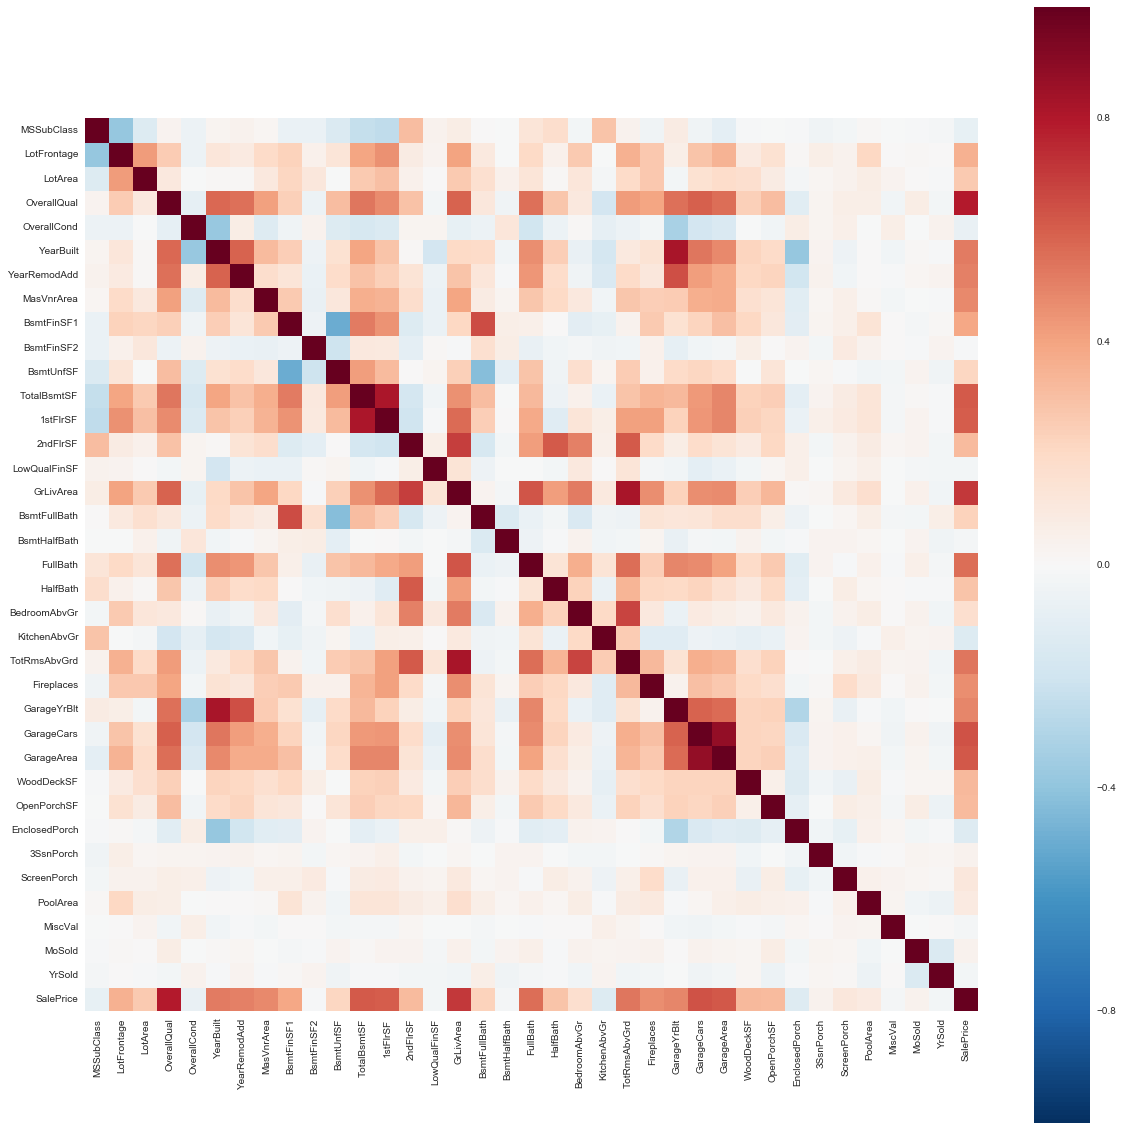

In [5]:
plt.figure(figsize=(20, 20))
corr = trainDf.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(corr, vmax=1, square=True)

In [6]:
trainDf1 = trainDf.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]

In [7]:
trainDf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

# Do the test train split now

In [8]:
from sklearn.cross_validation import train_test_split
X = trainDf.iloc[:,:-1]
y = trainDf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Imputing data

## 1. Lot Frontage 
(continous data - the spread of data is even through all sales price. So I replaced missing values with mean)

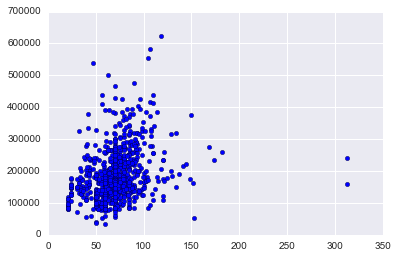

In [9]:
X_train['LotFrontage']=X_train.LotFrontage.fillna(X_train.LotFrontage.mean())
plt.scatter(X_train.LotFrontage, y_train)

## 2. Alley
nan's have no alley access according to the description


In [10]:
X_train['Alley'] = X_train['Alley'].fillna('None')
X_train['MasVnrType'] = X_train['MasVnrType'].fillna('None')
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(0)

In [11]:
X_train['BsmtQual'] = X_train.BsmtQual.fillna('NA')
X_train['BsmtCond'] = X_train.BsmtCond.fillna('NA')
X_train['BsmtFinType1'] = X_train.BsmtFinType1.fillna('NA')
X_train['BsmtFinType2'] = X_train.BsmtFinType2.fillna('NA')
X_train['BsmtExposure'] = X_train.BsmtFinType2.fillna('NA')
# Nulls for fireplaces correspond to None
X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna('NA')
X_train['GarageType'] = X_train['GarageType'].fillna('None')

In [12]:
X_train['GarageYrBlt'] = (X_train['GarageYrBlt'] - X_train['GarageYrBlt'].max())*-1.0
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(-1)
## Make sure other years are similarly scaled
X_train['YearBuilt'] = (X_train['YearBuilt'] - X_train['YearBuilt'].max())*-1.0
X_train['YearRemodAdd'] = (X_train['YearRemodAdd'] - X_train['YearRemodAdd'].max())*-1.0
X_train['YrSold'] = (X_train['YrSold'] - X_train['YrSold'].max())*-1.0

In [13]:
X_train['GarageFinish'] = X_train['GarageFinish'].fillna('NA')
X_train['GarageQual'] = X_train['GarageQual'].fillna('NA')
X_train['GarageCond'] = X_train['GarageCond'].fillna('NA')
X_train['PoolQC'] = X_train['PoolQC'].fillna('NA')
X_train['Fence'] = X_train['Fence'].fillna('NA')

## Add additional features to the dataframe
X_train['Gar2'] = 0
X_train[X_train.MiscFeature == 'Gar2'].Gar2 = 1
X_train['Shed'] = 0
X_train[X_train.MiscFeature == 'Shed'].Shed = 1
X_train['TennisCourt'] = 0
X_train[X_train.MiscFeature == 'TenC'].TennisCourt = 1

In [14]:
## get dummies for MiscFeature
X_train['MiscFeature'].fillna('NA')
dum = pd.get_dummies(X_train['MiscFeature'].fillna('NA'))
del dum['NA']
for col in dum.columns:
    dum[col] = dum[col]*X_train['MiscVal']
    X_train[col] = dum[col]
del X_train['MiscFeature']
del X_train['MiscVal']

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 82 columns):
Id               978 non-null int64
MSSubClass       978 non-null int64
MSZoning         978 non-null object
LotFrontage      978 non-null float64
LotArea          978 non-null int64
Street           978 non-null object
Alley            978 non-null object
LotShape         978 non-null object
LandContour      978 non-null object
Utilities        978 non-null object
LotConfig        978 non-null object
LandSlope        978 non-null object
Neighborhood     978 non-null object
Condition1       978 non-null object
Condition2       978 non-null object
BldgType         978 non-null object
HouseStyle       978 non-null object
OverallQual      978 non-null int64
OverallCond      978 non-null int64
YearBuilt        978 non-null float64
YearRemodAdd     978 non-null float64
RoofStyle        978 non-null object
RoofMatl         978 non-null object
Exterior1st      978 non-null object
Exteri

In [17]:
float_cols = X_train.select_dtypes(include = ['float64']).columns
for col in float_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mean())

In [18]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Gar2,Othr,Shed,TenC
615,616,85,RL,80.0,8800,Pave,None,Reg,Lvl,AllPub,...,NA,MnPrv,5,-0.0,WD,Abnorml,0.0,0.0,0.0,0.0
613,614,20,RL,70.0,8402,Pave,None,Reg,Lvl,AllPub,...,NA,NA,12,3.0,New,Partial,0.0,0.0,0.0,0.0
1303,1304,20,RL,73.0,8688,Pave,None,Reg,Lvl,AllPub,...,NA,NA,4,4.0,WD,Normal,0.0,0.0,0.0,0.0
486,487,20,RL,79.0,10289,Pave,None,Reg,Lvl,AllPub,...,NA,NA,6,3.0,WD,Normal,0.0,0.0,0.0,0.0
561,562,20,RL,77.0,10010,Pave,None,Reg,Lvl,AllPub,...,NA,NA,4,4.0,WD,Normal,0.0,0.0,0.0,0.0


# Encoding categorical data

### Convert some of the ranked categorical to numerical data

In [19]:
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',\
        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
Qs = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':-1}
for col in cols:
    X_train[col] = X_train[col].apply(lambda x: Qs[x])

### Encode non-ranked data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oneHotEncoder = preprocessing.OneHotEncoder()
cols_that_need_to_be_encoded = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', \
                               'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',\
                               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',\
                               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','GarageType',\
                               'Functional', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

for col in cols_that_need_to_be_encoded:
    # First encode the fucking labels to integers
    X_train[col] = le.fit_transform(X_train[col])
    oneHotEncoder.fit([[x] for x in set(X_train[col])])
    X_train[col] = X_train[col].apply(lambda x: oneHotEncoder.transform(x).toarray())

In [20]:
## Somehow the sklearn is messing up on one hot encoding
cols_that_need_to_be_encoded = X_train.select_dtypes(include = ['object']).columns
for col in cols_that_need_to_be_encoded:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[col]).rename(columns = lambda x:str(col)+'_'+x)], axis = 1)

In [21]:
for col in cols_that_need_to_be_encoded:
    del X_train[col]

# Preprocessing: Scaling features

### Scale all numerical data between 0-1

In [22]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
#X_train[list(X_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].columns.values)] = minmax.fit_transform(X_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].as_matrix())
X_train.iloc[:,1:] = minmax.fit_transform(X_train.iloc[:,1:])

# Feature importance


In [23]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
615,616,0.382353,0.202055,0.035056,0.555556,0.75,0.340580,0.783333,0.113208,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
613,614,0.000000,0.167808,0.033195,0.444444,0.50,0.021739,0.050000,0.000000,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1303,1304,0.000000,0.178082,0.034532,0.666667,0.50,0.036232,0.083333,0.165457,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
486,487,0.000000,0.198630,0.042015,0.444444,0.75,0.326087,0.750000,0.121916,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
561,562,0.000000,0.191781,0.040711,0.444444,0.50,0.260870,0.583333,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


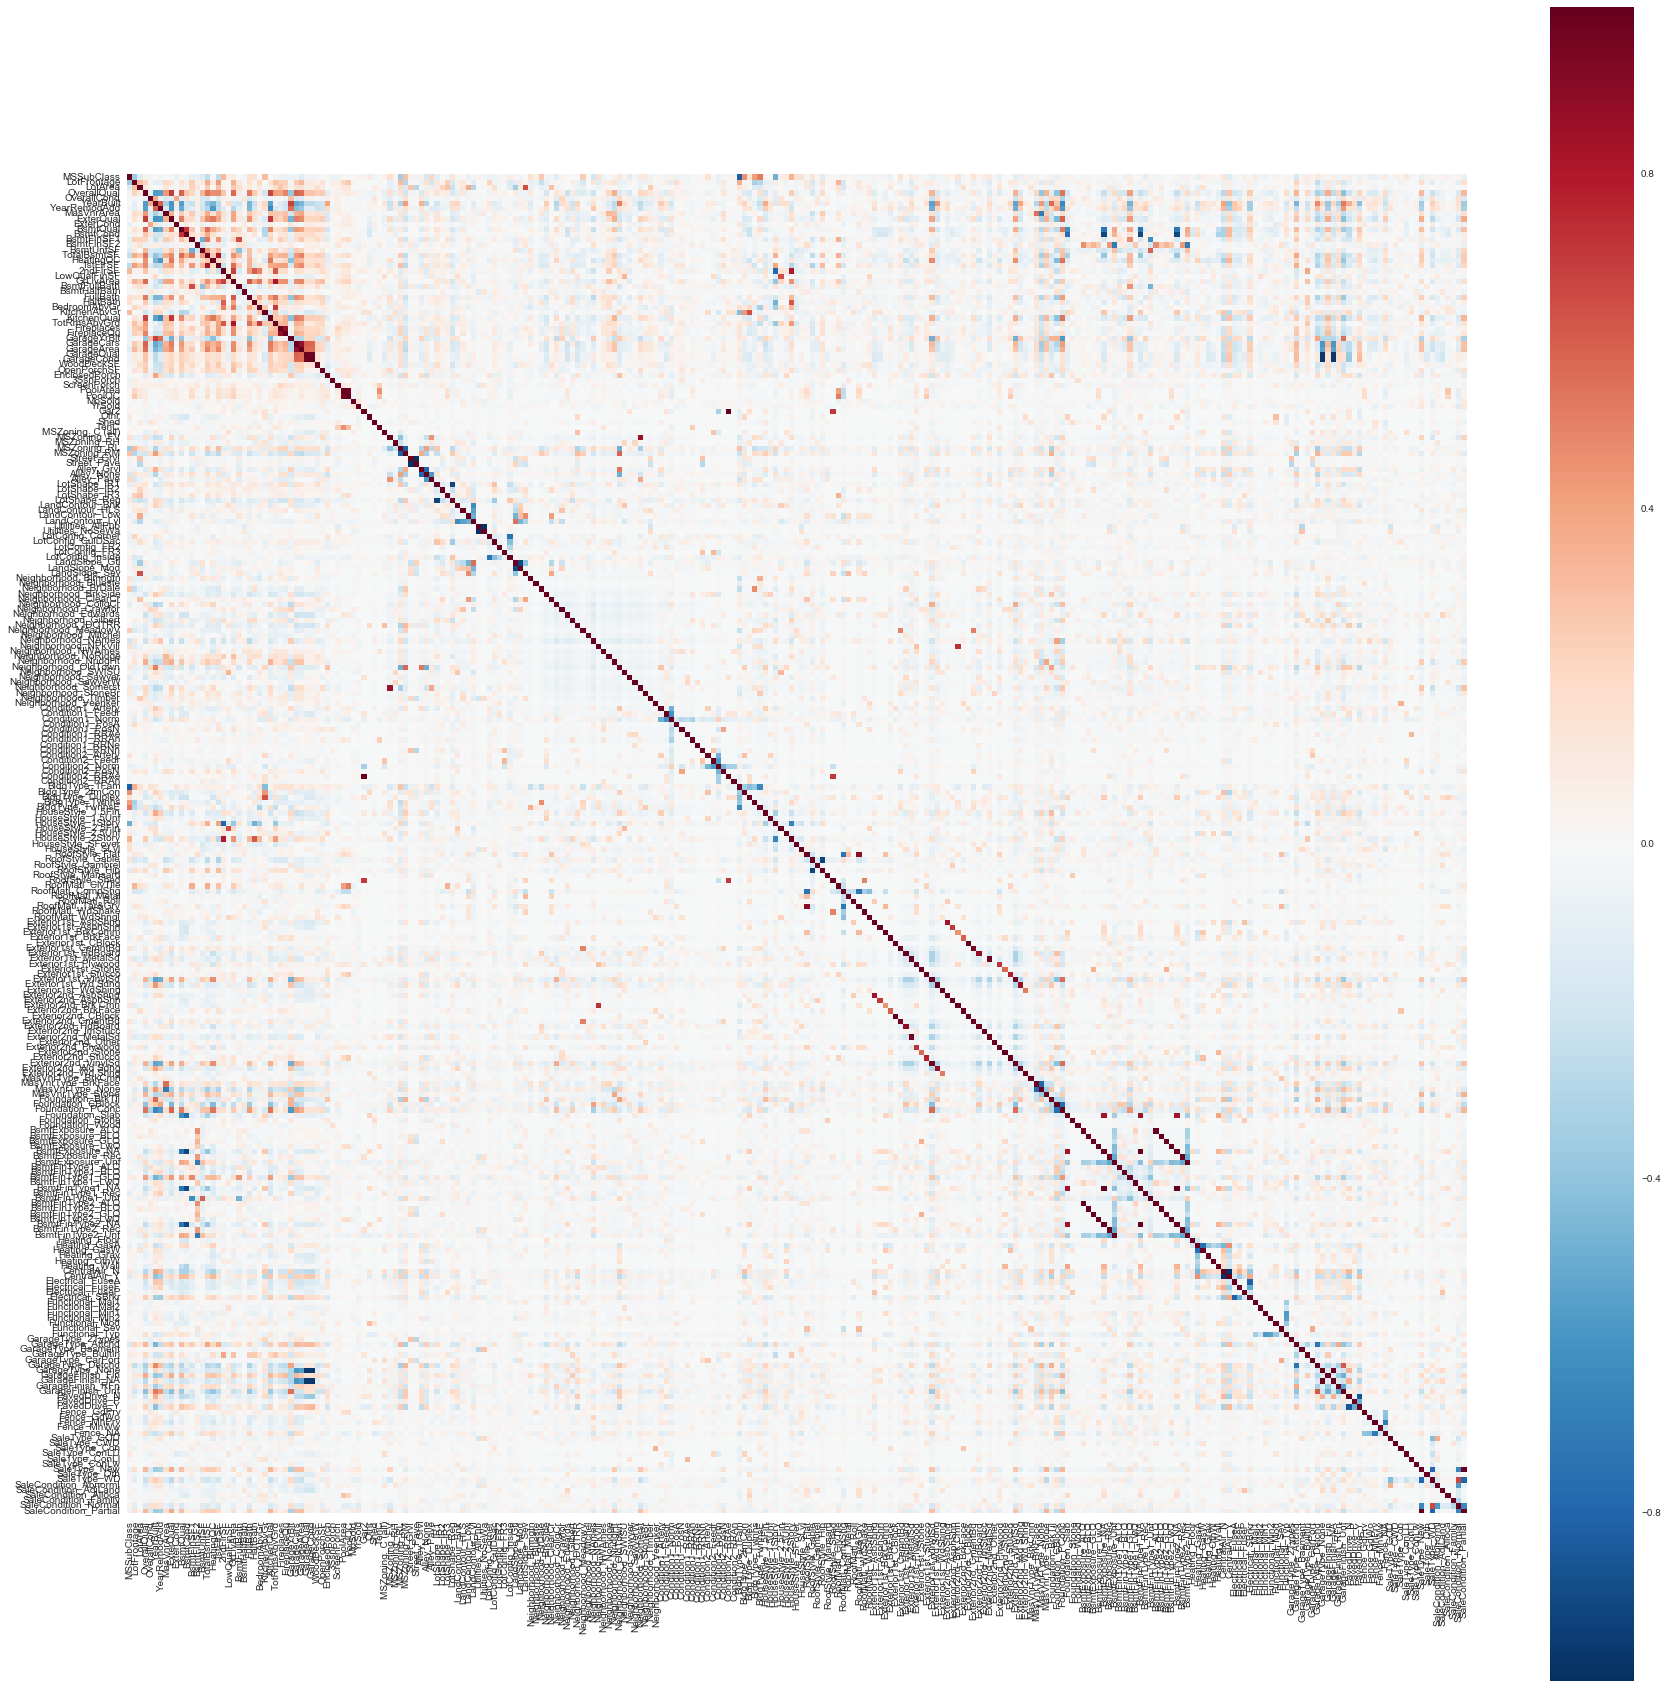

In [24]:
plt.figure(figsize=(30, 30))
corr = X_train.iloc[:,1:].corr()
sns.heatmap(corr, vmax=1, square=True)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SKbest = SelectKBest(f_regression, k=75)
X_train_new = SKbest.fit_transform(X_train, y_train[X_train.index])

In [26]:
(zip(X_train.columns[SKbest.scores_.argsort()[::-1]],SKbest.scores_[SKbest.scores_.argsort()[::-1]]))


[('OverallQual', 1579.0752420280241),
 ('GrLivArea', 824.97940764316684),
 ('ExterQual', 777.37704944911718),
 ('KitchenQual', 738.57449599315657),
 ('GarageCars', 696.39823155488796),
 ('GarageArea', 628.53529107277848),
 ('TotalBsmtSF', 521.88271633462409),
 ('1stFlrSF', 501.61327408716664),
 ('BsmtQual', 420.78823296151148),
 ('FullBath', 402.86388150201299),
 ('FireplaceQu', 374.06751103076044),
 ('YearRemodAdd', 365.76889394412103),
 ('YearBuilt', 357.47759703444751),
 ('TotRmsAbvGrd', 355.55297653943938),
 ('Foundation_PConc', 301.60166772620545),
 ('MasVnrArea', 276.98504256112881),
 ('Fireplaces', 261.3489863921734),
 ('HeatingQC', 236.2508548022391),
 ('BsmtFinType1_GLQ', 217.60957679211236),
 ('GarageFinish_Unf', 200.61519634266443),
 ('GarageFinish_Fin', 185.70186586307844),
 ('Neighborhood_NridgHt', 180.85697160643426),
 ('GarageYrBlt', 152.03617403306959),
 ('SaleCondition_Partial', 146.79655900159815),
 ('SaleType_New', 146.20170019921963),
 ('MasVnrType_None', 145.298639

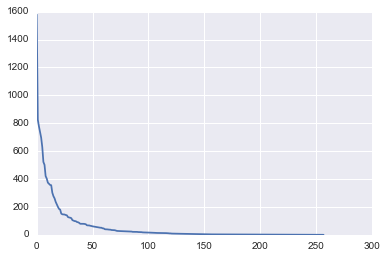

In [27]:
plt.plot(SKbest.scores_[SKbest.scores_.argsort()[::-1]])

# Seems like the feature importance tapers off after 75. So lets narrow it down to top 75 features

In [28]:
selected_cols = X_train.columns[SKbest.scores_.argsort()[::-1]][:75]

# Try to work with random forests

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
estimator = RandomForestRegressor(random_state = 42, n_estimators=100, max_depth = 3)
trees = estimator.fit(X_train[selected_cols], y_train[X_train.index])
score = cross_val_score(estimator, X_train[selected_cols], y_train[X_train.index]).mean()

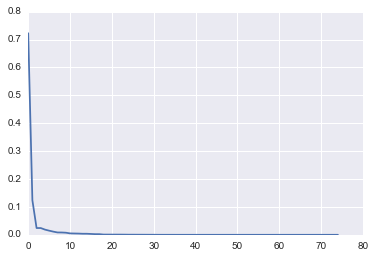

In [30]:

plt.plot(trees.feature_importances_[trees.feature_importances_.argsort()[::-1]])


# Seems like important features drop off dramatically after 4, lets only focus on top 10 features

Top 10 features are:

In [31]:
top_10_features = selected_cols[trees.feature_importances_.argsort()[::-1]][:20]

# Collinearity?

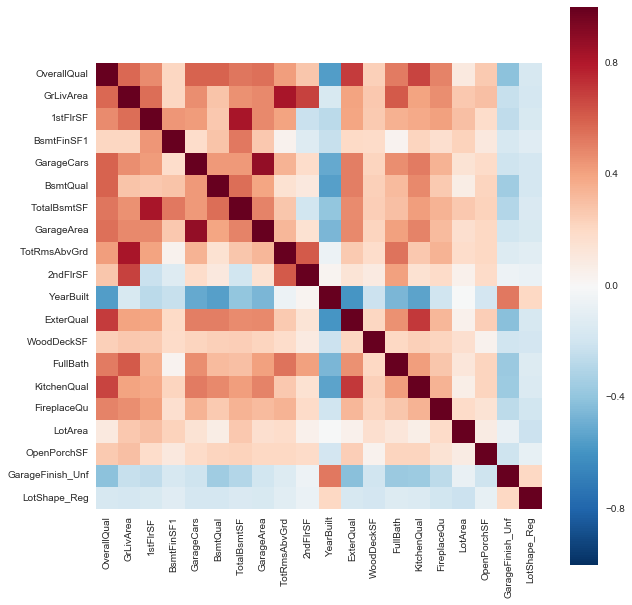

In [32]:
plt.figure(figsize=(10, 10))
corr = X_train[top_10_features].corr()
sns.heatmap(corr, vmax=1, square=True)
plt.rcParams.update({'font.size': 22})

# Seems like some of the features are correlated to each other:
For example:

TotalBasement(SqFoot) is correlated with 1st floor sqft

Garage area is correlated with garage cars

We could engineer features with this or just use one of them

In [33]:
top_10_features = top_10_features.drop('TotalBsmtSF')

In [34]:
top_10_features = top_10_features.drop('GarageArea')

In [35]:
top_10_features

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'BsmtFinSF1', u'GarageCars',
       u'BsmtQual', u'TotRmsAbvGrd', u'2ndFlrSF', u'YearBuilt', u'ExterQual',
       u'WoodDeckSF', u'FullBath', u'KitchenQual', u'FireplaceQu', u'LotArea',
       u'OpenPorchSF', u'GarageFinish_Unf', u'LotShape_Reg'],
      dtype='object')

# Let's try different regression techniques

# 1. Linear regression

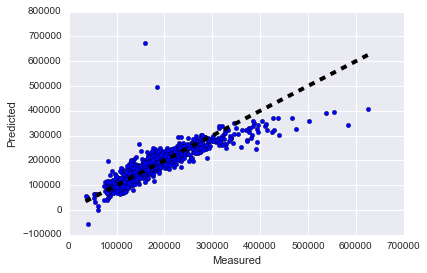

36836.6886787


In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_predict

lr = linear_model.LinearRegression()
y_sub = y_train[X_train.index]
predicted = cross_val_predict(lr, X_train[top_10_features], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_lr = mean_squared_error(y_sub, predicted)
print np.sqrt(mse_lr)

In [37]:
lr.fit(X_train[top_10_features], y_sub).coef_

array([ 129760.97170287,  240049.7143815 ,  -50852.13364789,
         88528.67516458,   60157.47723256,   26696.38368043,
         47766.33153335,  -39666.43892254,  -14548.2557188 ,
         43142.23738681,   20690.63211775,   -5388.81273329,
         34140.32098795,   15282.43487502,  115093.84162525,
         -4210.56016625,   -6468.72115961,   -3665.99270811])

# 2. Linear regression (Lasso)

tune for alpha first!

/Users/nemo/anaconda/envs/bookrecommender/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


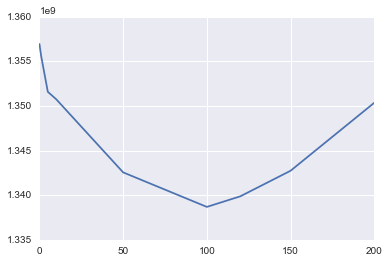

In [38]:
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.6, 1,5,10, 50, 100, 120, 150,200]
mse_lass = []
for al in a:
    clf = linear_model.Lasso(alpha=al)
    predicted_lasso = cross_val_predict(clf, X_train[top_10_features], y_sub, cv=10)
    mse_lass.append(mean_squared_error(y_sub, predicted_lasso))
plt.plot(a, mse_lass)

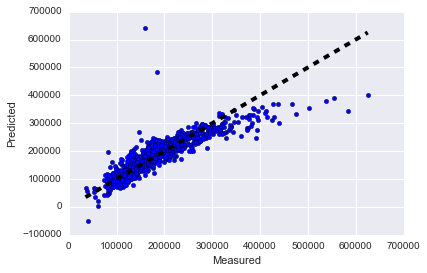

36588.0311064


In [39]:
clf = linear_model.Lasso(alpha=100)
predicted_lasso = cross_val_predict(clf, X_train[top_10_features], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_lasso)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_lasso = mean_squared_error(y_sub, predicted_lasso)
print np.sqrt(mse_lasso)

In [40]:
clf.fit(X_train[top_10_features], y_sub).coef_

array([ 128598.84896126,  117768.96902941,   41664.68698643,
         81281.85328335,   60793.5917074 ,   26272.16686592,
         44902.15202741,       0.        ,  -10076.83169135,
         41945.49301368,   19513.88992715,       0.        ,
         34947.67401883,   16567.453565  ,   83490.86923862,
            -0.        ,   -6934.70381896,   -4382.52574845])

## features not being used in the fit

In [41]:
top_10_features

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'BsmtFinSF1', u'GarageCars',
       u'BsmtQual', u'TotRmsAbvGrd', u'2ndFlrSF', u'YearBuilt', u'ExterQual',
       u'WoodDeckSF', u'FullBath', u'KitchenQual', u'FireplaceQu', u'LotArea',
       u'OpenPorchSF', u'GarageFinish_Unf', u'LotShape_Reg'],
      dtype='object')

In [42]:
not_zero = top_10_features[clf.fit(X_train[top_10_features], y_sub).coef_ != 0.]
print not_zero

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'BsmtFinSF1', u'GarageCars',
       u'BsmtQual', u'TotRmsAbvGrd', u'YearBuilt', u'ExterQual', u'WoodDeckSF',
       u'KitchenQual', u'FireplaceQu', u'LotArea', u'GarageFinish_Unf',
       u'LotShape_Reg'],
      dtype='object')


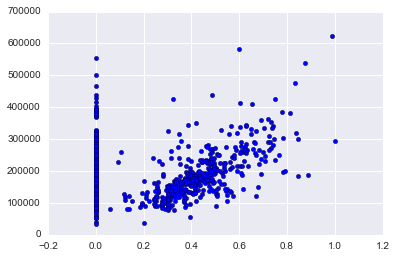

In [43]:
plt.scatter(X_train['2ndFlrSF'], y_sub)

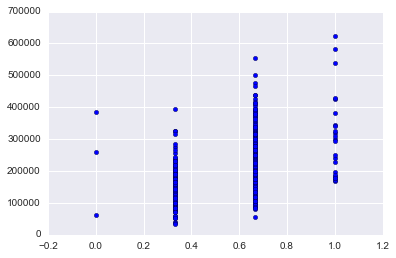

In [44]:
plt.scatter(X_train['FullBath'], y_sub)

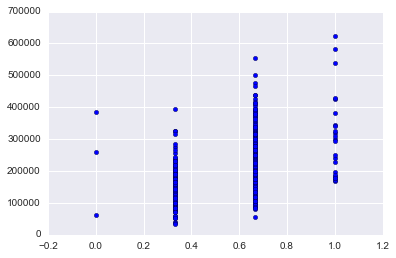

In [45]:
plt.scatter(X_train['FullBath'], y_sub)

# 3. Ridge Regression

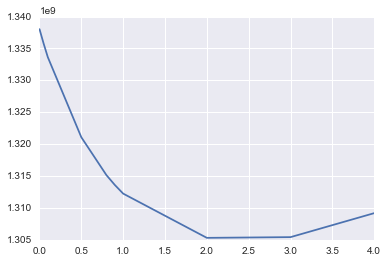

In [46]:
a = [0.001, 0.005, 0.05, 0.1, 0.5, 0.8, 0.9, 1, 2, 3, 4]
mse_ridg = []
for al in a:
    clf_ridge = linear_model.Ridge(alpha=al)
    predicted_ridge = cross_val_predict(clf_ridge, X_train[not_zero], y_sub, cv=10)
    mse_ridg.append(mean_squared_error(y_sub, predicted_ridge))
plt.plot(a, mse_ridg)

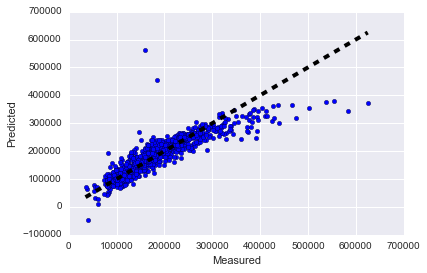

36130.581987


In [47]:
clf_ridge = linear_model.Ridge(alpha=3)
predicted_ridge = cross_val_predict(clf_ridge, X_train[not_zero], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_ridge)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_ridge = mean_squared_error(y_sub, predicted_ridge)
print np.sqrt(mse_ridge)

# 4. Elastic Net

In [80]:
clf_EN = linear_model.ElasticNetCV(alphas=[0.001, 0.05, 0.01, 0.05, 0.1, 1.0], l1_ratio = [.1, 0.2, 0.3, .4, 0.45, .5, .7, .9])
clf_EN.fit(X_train[not_zero], np.log1p(y_sub))
print clf_EN.alpha_
print clf_EN.l1_ratio_

0.01
0.1


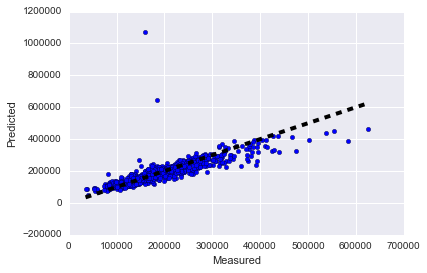

43665.2495641


In [81]:
clf_ElasticNet = linear_model.ElasticNet(alpha=0.01, l1_ratio = 0.1)
predicted_EN = cross_val_predict(clf_ridge, X_train[not_zero], np.log1p(y_sub), cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, np.expm1(predicted_EN))
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_EN = mean_squared_error(y_sub, np.expm1(predicted_EN))
print np.sqrt(mse_EN)

In [56]:
clf_ElasticNet.n_iter_

AttributeError: 'ElasticNet' object has no attribute 'n_iter_'

# 5. Adding poly features

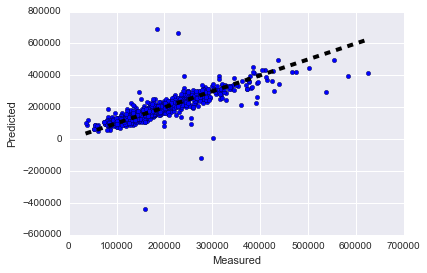

44934.1108589


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', linear_model.LinearRegression(fit_intercept=False))])
predicted_poly = cross_val_predict(model, X_train[not_zero], y_sub, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_poly)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_poly = mean_squared_error(y_sub, predicted_poly)
print np.sqrt(mse_poly)

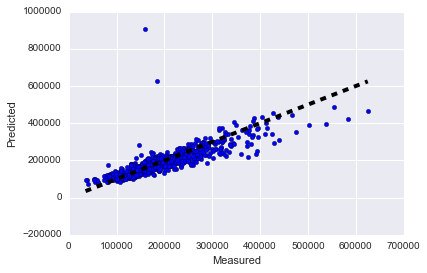

41083.8440334


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', clf_ElasticNet)])
predicted_poly = cross_val_predict(model, X_train[not_zero], np.log1p(y_sub), cv=10)
fig, ax = plt.subplots()
ax.scatter(y_sub, np.expm1(predicted_poly))
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_poly = mean_squared_error(y_sub, np.expm1(predicted_poly))
print np.sqrt(mse_poly)

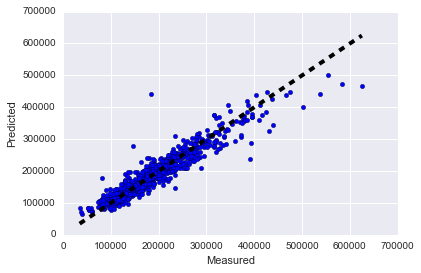

24895.4594551


In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', clf_ElasticNet)])
clf = model.fit(X_train[not_zero], y_sub)
predicted_poly = clf.predict(X_train[not_zero])
fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_poly)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_poly = mean_squared_error(y_sub, predicted_poly)
print np.sqrt(mse_poly)

# 6. Random Forest Regression

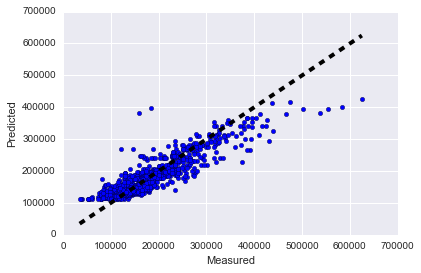

34580.1775926


In [69]:
from sklearn import ensemble
clf_randForest = ensemble.RandomForestRegressor(random_state = 42, max_depth = 3)

predicted_rand = clf_randForest.fit(X_train[not_zero], y_sub).predict(X_train[not_zero])
mse_rand = mean_squared_error(y_sub, predicted_rand)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_rand)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print np.sqrt(mse_rand)


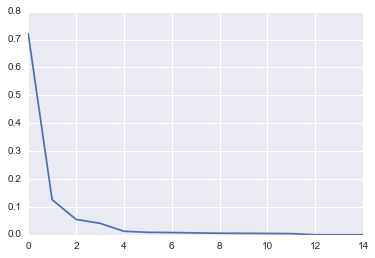

In [70]:
plt.plot(clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_[clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_.argsort()[::-1]])

In [71]:
not_zero[clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_ == 0]

Index([u'FireplaceQu', u'LotArea', u'LotShape_Reg'], dtype='object')

In [72]:
not_zero_new = not_zero.drop('LotArea')

# 7. Gradient boosting regressor

### Tuning for learning rate

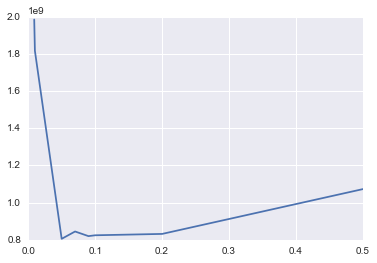

In [73]:
a = [0.009, 0.01, 0.05, 0.07, 0.09, 0.1, 0.2, 0.5]
mse_grad = []
for al in a:
    clf_grad = ensemble.GradientBoostingRegressor(random_state = 42, max_depth = 4, n_estimators=100, learning_rate= al)
    predicted_grad = cross_val_predict(clf_grad, X_train[not_zero], y_sub, cv=10)
    mse_grad.append(mean_squared_error(y_sub, predicted_grad))
plt.plot(a, mse_grad)

### Tuning for number of trees

In [74]:
range(0,110,10)[1:]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

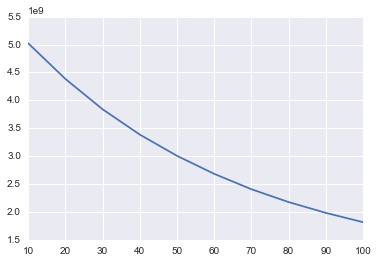

In [75]:
n = range(0,110,10)[1:]
mse_grad = []
for nl in n:
    clf_grad = ensemble.GradientBoostingRegressor(random_state = 42, max_depth = 4, n_estimators=nl, learning_rate= 0.01)
    predicted_grad = cross_val_predict(clf_grad, X_train[not_zero], y_sub, cv=10)
    mse_grad.append(mean_squared_error(y_sub, predicted_grad))
plt.plot(n, mse_grad)

### Fuck it do a grid search

In [76]:
from sklearn import grid_search
param_grid = {'learning_rate': [0.009, 0.01, 0.05, 0.07, 0.09, 0.1, 0.2, 0.5],
              'max_depth': range(1,10),
              'min_samples_leaf': [2, 3, 5, 9, 17],
              'n_estimators': range(0,110,10)[1:] 
              }
clf_grad = ensemble.GradientBoostingRegressor(random_state = 42)
gs_cv = grid_search.GridSearchCV(clf_grad, param_grid, n_jobs=4).fit(X_train[not_zero], np.log1p(y_sub))


In [77]:
gs_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_leaf': 9,
 'n_estimators': 100}

In [67]:
np.log1p(y_sub)

615     11.831386
613     11.898195
1303    12.354497
486     11.957618
561     12.043560
308     11.320566
461     11.951187
1142    12.959541
730     12.373708
1155    12.292255
1203    12.269052
700     12.652363
849     12.138869
1260    12.106258
787     12.358798
352     11.461643
710     10.859018
124     12.106258
178     13.126033
287     11.385103
1407    11.626263
1208    11.849405
294     12.025755
327     11.886219
1456    12.254868
841     11.967187
1121    12.268583
931     11.674202
236     12.130816
88      11.350418
          ...    
747     12.491176
252     12.061053
21      11.845110
1337    10.868587
459     11.608245
1184    12.137264
276     12.211065
955     11.884496
1215    11.736077
385     12.165256
805     12.335701
1437    12.885673
343     12.491255
769     13.195616
1332    11.512935
130     12.328295
871     12.208575
1123    11.678448
1396    11.982935
87      12.010672
330     11.686887
1238    11.867104
466     12.025755
121     11.512935
1044    12

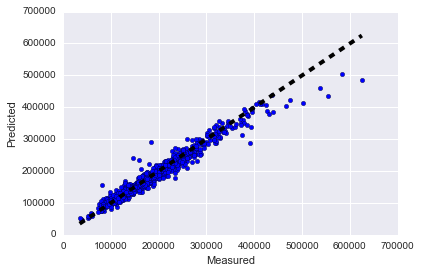

16598.3979903


In [79]:
clf_grad = ensemble.GradientBoostingRegressor(random_state = 42, min_samples_leaf = 9,max_depth = 5, n_estimators=100, learning_rate= 0.05)
grad_tree = clf_grad.fit(X_train[not_zero], np.log1p(y_sub))
predicted_grad = grad_tree.predict(X_train[not_zero])
mse_grad = mean_squared_error(y_sub, np.expm1(predicted_grad))

fig, ax = plt.subplots()
ax.scatter(y_sub, np.expm1(predicted_grad))
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print np.sqrt(mse_grad)

In [ ]:
plt.plot(clf_grad.fit(X_train[not_zero], y_sub).feature_importances_[clf_grad.fit(X_train[not_zero], y_sub).feature_importances_.argsort()[::-1]])

In [ ]:
clf_grad.fit(X_train[not_zero], y_sub).feature_importances_

In [85]:
import xgboost as xgb

ImportError: No module named xgboost

In [86]:
%%bash
pip install xgboost

  Running setup.py bdist_wheel for xgboost: started
  Running setup.py bdist_wheel for xgboost: finished with status 'done'
  Stored in directory: /Users/nemo/Library/Caches/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built xgboost


In [ ]:
pd.read_csv('test.csv')

In [ ]:
dictx = {'Id': X_train.index, 'SalePrice': predicted_grad}
outDf = pd.DataFrame(dictx)
outDf.to_csv('out.csv', index = False)

In [ ]:
testDf = pd.read_csv('test.csv')
testDf.info()

In [ ]:
testDf.select_dtypes(include = ['float64']).columns